# EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = "/content/drive/MyDrive/Поступашки ML/Данные"

train = pd.read_csv(f"{base_path}/train.csv")
test = pd.read_csv(f"{base_path}/test.csv")
sample_sub = pd.read_csv(f"{base_path}/sample_submission.csv")

print(train.shape)
print(test.shape)

(200000, 202)
(200000, 201)


In [ ]:
train.head(10)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [ ]:
train = train.drop('ID_code', axis=1)

Уберём id code, так как он не несёт никакой информации

In [ ]:
train.isnull().sum().sum()

np.int64(0)

Проверим баланс классов

In [ ]:
train['target'].value_counts(normalize=True)

,proportion
target,
0,0.89951
1,0.10049


In [ ]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
corr_with_target = train.select_dtypes(include='number')\
                         .corr()['target']\
                         .sort_values(ascending=False)
corr_with_target.head(10)

,target
target,1.000000
var_6,0.066731
var_110,0.064275
var_53,0.063399
var_26,0.062422
var_22,0.060558
var_99,0.058367
var_190,0.055973
var_2,0.055870
var_133,0.054548


Видим дисбаланс классов, значит лучше использовать стратифицированный отбор для обучения моделей

In [ ]:
train['target'].value_counts(normalize=True)

,proportion
target,
0,0.89951
1,0.10049


In [ ]:
corr = train.corr()['target']
corr.abs().sort_values(ascending=False).head(20)

,target
target,1.000000
var_81,0.080917
var_139,0.074080
var_12,0.069489
var_6,0.066731
var_110,0.064275
var_146,0.063644
var_53,0.063399
var_26,0.062422
var_76,0.061917


Смотрим на оценку плотности распределения

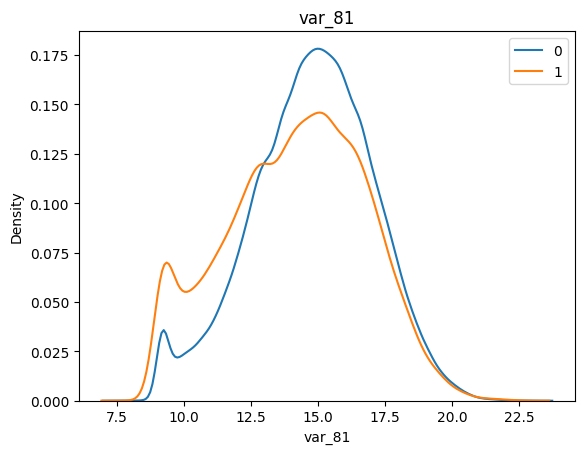

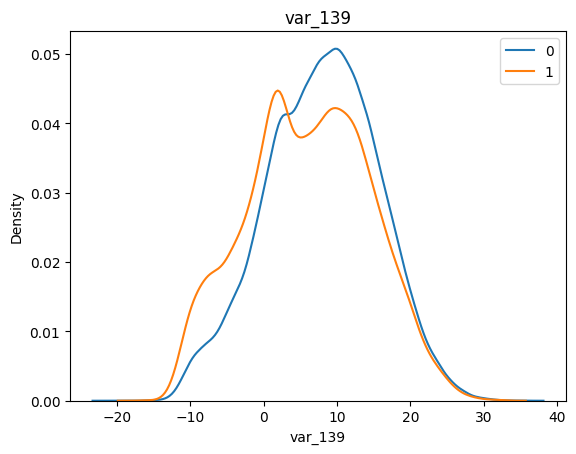

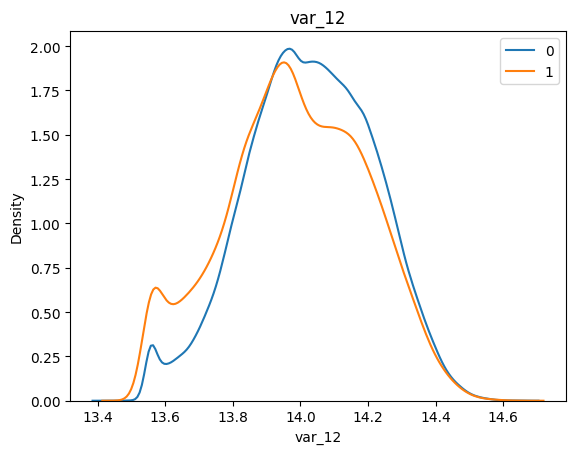

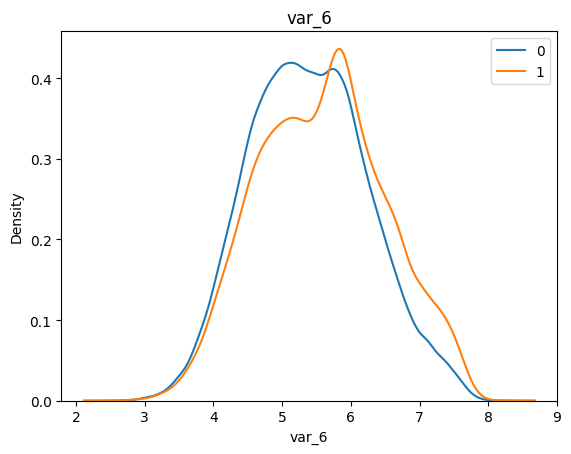

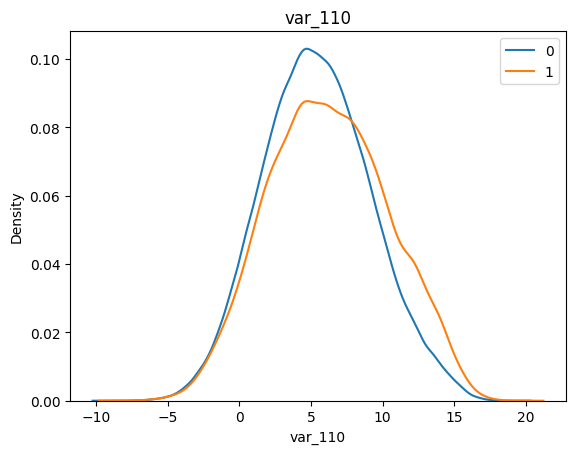

In [ ]:
top_vars = corr.abs().sort_values(ascending=False).index[1:6]

for col in top_vars:
    sns.kdeplot(train[train['target']==0][col], label='0')
    sns.kdeplot(train[train['target']==1][col], label='1')
    plt.title(col)
    plt.legend()
    plt.show()

У всех признаков почти одинаковое распределение

In [ ]:
train.std().describe()

,0
count,201.000000
mean,4.473784
std,3.463603
min,0.007186
25%,1.650912
50%,3.944604
75%,6.225305
max,21.404912


In [ ]:
train.describe(percentiles=[0.01, 0.99])

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
1%,0.000000,4.424795,-9.883609,5.456700,2.515897,7.559999,-21.060402,3.600600,9.766999,-6.732503,...,-6.635901,1.338400,-1.246204,-5.986603,11.150198,-3.203203,-8.839802,6.816799,8.562298,-26.192008
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
99%,1.000000,18.175902,7.541700,17.321000,11.212600,14.484700,12.290505,7.438301,23.892501,6.660100,...,13.525903,14.801100,5.361302,11.922604,24.468600,3.217300,13.905200,10.865101,22.142108,16.539100
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
train

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


Инсайты по данным

*   Датасет удивительно чистый, без пропусков и корелляции между признаками

*   Сигнал слабый и распределён по всем 200 признакам.

*   Признаки почти независимы.

*   Не уверен как тут делать feature engeneering, когда все признаки анонимны и практически независимы

*   Основной прирост качества будет от ансамблей и CV, а не от обработки данных.



# LogReg

Попробуем как покажут себя линейная модель. Возьмём логистическую регрессию

Как мы видели, у нас сильный дисбаланс классов, а значит нам надо нормализовать признаки

In [ ]:
X = train.drop(columns=['target'])
y = train['target']
X_test = test.drop(columns=['ID_code'])

In [ ]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits = 5,
    shuffle = True,
    random_state = 17
)

class_weight="balanced", чтобы сбалансировать классы

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter = 3000,
        class_weight="balanced",
        solver ="lbfgs"
    ))
])

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    pipe,
    X,
    y,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

print("Fold AUC:", scores)
print("Mean AUC:", scores.mean())
print("Std:", scores.std())

Fold AUC: [0.85784735 0.85893109 0.8579905  0.86063243 0.86115348]
Mean AUC: 0.8593109714846336
Std: 0.001354344079644319


Линейная модель показала очень неплохие результаты на кросс валидации, получился довольно сильный бейзлайн. Теперь попробуем улучшить скор ансамблевыми методами

# Анасамбли

## Lightgbm

In [67]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# единая подготовка (один раз!)
X = train.drop(columns=['target'])
y = train['target'].to_numpy()
X_test = test.drop(columns=['ID_code'])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

oof = np.zeros(len(X))
test_pred = np.zeros(len(X_test))
scores = []

for fold, (tr_idx, va_idx) in enumerate(cv.split(X, y), 1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y[tr_idx], y[va_idx]

    model = lgb.LGBMClassifier(
        objective="binary",
        metric="auc",
        n_estimators=5000,
        learning_rate=0.05,
        max_depth=3,
        num_leaves=8,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_samples=30,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        verbosity=-1
    )

    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric="auc",
        callbacks=[lgb.early_stopping(200, verbose=False)]
    )

    va_pred = model.predict_proba(X_va)[:, 1]
    oof[va_idx] = va_pred

    fold_auc = roc_auc_score(y_va, va_pred)
    scores.append(fold_auc)

    test_pred += model.predict_proba(X_test)[:, 1] / cv.n_splits

    print(f"Fold {fold} AUC: {fold_auc:.6f} | best_iter: {model.best_iteration_}")

print("\nMean AUC:", np.mean(scores))
print("Std AUC:", np.std(scores))
print("OOF AUC:", roc_auc_score(y, oof))

Fold 1 AUC: 0.896630 | best_iter: 3156
Fold 2 AUC: 0.897635 | best_iter: 2908
Fold 3 AUC: 0.891218 | best_iter: 3342
Fold 4 AUC: 0.894852 | best_iter: 2549
Fold 5 AUC: 0.896705 | best_iter: 2699

Mean AUC: 0.895408184921153
Std AUC: 0.0022804790579671226
OOF AUC: 0.895314073866151


После длительной настройки я добился вполне неплохого скора на ~0.04 выше чем у бейзлайна.

## Catboost

Попробуем обучить катбуст

In [32]:
pip install catboost

## CatBoost + Feature-wise Augmentation + Seed Ensemble

В этом блоке реализована модель CatBoost с двумя приёмами повышения качества: аугментацией признаков и ансамблированием по разным случайным инициализациям.

Сначала используется стратифицированная 5-fold кросс-валидация для корректной оценки качества (OOF AUC).

На каждом фолде к train-части применяется feature-wise augmentation: создаются синтетические объекты путём случайного перемешивания значений признаков внутри одного класса(это я подсмотрел в одном из блокнотов). Это увеличивает объём данных, снижает variance и помогает модели лучше уловить слабый сигнал.

Далее обучается несколько моделей CatBoost с разными random_seed(это тоже было в блокнотах на 0.9 скора), и их предсказания усредняются (seed ensemble). Это дополнительно снижает дисперсию и делает модель более стабильной.

В результате формируются:

oof_cat — OOF-предсказания для оценки качества,

test_cat — усреднённые предсказания для формирования submission.

Такой подход позволил улучшить стабильность модели и повысить итоговый скор.

In [51]:


import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


SEED = 42

# y как 1D numpy
y1 = np.asarray(y).reshape(-1)

def featurewise_augment(X_np, y_np, mult_pos=1.0, mult_neg=0.0, seed=42):
    """
    Делает синтетические объекты, перемешивая значения признаков внутри каждого класса.


    X_np: np.ndarray (n, d)
    y_np: np.ndarray (n,)
    mult_pos: сколько добавить относительно числа объектов класса 1 (1.0 => +100%)
    mult_neg: сколько добавить относительно числа объектов класса 0
    """
    rng = np.random.default_rng(seed)
    X_np = np.asarray(X_np)
    y_np = np.asarray(y_np)

    def make_class(label, mult):
        idx = np.where(y_np == label)[0]
        if idx.size == 0 or mult <= 0:
            return None, None

        Xc = X_np[idx]                 # (n_c, d)
        n_new = int(idx.size * mult)   # сколько новых строк

        # для каждого признака выбираем случайную строку из Xc независимо
        rows = rng.integers(0, Xc.shape[0], size=(n_new, Xc.shape[1]))
        X_new = np.take_along_axis(Xc, rows, axis=0)
        y_new = np.full(n_new, label, dtype=y_np.dtype)
        return X_new, y_new

    Xp, yp = make_class(1, mult_pos)
    Xn, yn = make_class(0, mult_neg)

    X_all = [X_np]
    y_all = [y_np]

    if Xp is not None:
        X_all.append(Xp); y_all.append(yp)
    if Xn is not None:
        X_all.append(Xn); y_all.append(yn)

    X_aug = np.vstack(X_all)
    y_aug = np.concatenate(y_all)

    # перемешать
    perm = rng.permutation(len(y_aug))
    return X_aug[perm], y_aug[perm]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

oof_cat = np.zeros(len(X), dtype=float)
test_cat = np.zeros(len(X_test), dtype=float)
scores = []

# настройки аугментации
AUG_MULT_POS = 1.0   # старт: 1.0 (можно потом попробовать 2.0)
AUG_MULT_NEG = 0.0   # обычно 0.0

# seeds ансамбля (5 штук — норм)
SEEDS = [0, 1, 2, 3, 4]

for fold, (tr_idx, va_idx) in enumerate(cv.split(X, y1), 1):
    # исходные фолд-данные
    X_tr = X.iloc[tr_idx].values
    X_va = X.iloc[va_idx].values
    y_tr = y1[tr_idx]
    y_va = y1[va_idx]

    # augmentation только на train-фолде
    X_tr_aug, y_tr_aug = featurewise_augment(
        X_tr, y_tr,
        mult_pos=AUG_MULT_POS,
        mult_neg=AUG_MULT_NEG,
        seed=1000 + fold
    )

    val_pred_fold = np.zeros(len(va_idx), dtype=float)
    test_pred_fold = np.zeros(len(X_test), dtype=float)

    for s in SEEDS:
        model = CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="AUC",

            task_type="GPU",
            devices="0",

            iterations=20000,
            learning_rate=0.03,
            depth=6,
            l2_leaf_reg=3.0,

            random_seed=10_000 + 100 * fold + s,
            verbose=False,

            od_type="Iter",
            od_wait=300
        )

        model.fit(
            X_tr_aug, y_tr_aug,
            eval_set=(X_va, y_va),
            use_best_model=True
        )

        val_pred_fold += model.predict_proba(X_va)[:, 1] / len(SEEDS)
        test_pred_fold += model.predict_proba(X_test.values)[:, 1] / len(SEEDS)

    # фиксируем OOF и test (среднее по фолдам)
    oof_cat[va_idx] = val_pred_fold
    test_cat += test_pred_fold / cv.n_splits

    fold_auc = roc_auc_score(y_va, val_pred_fold)
    scores.append(fold_auc)
    print(f"Cat Fold {fold} AUC: {fold_auc:.6f}")

print("\nCat Mean AUC:", float(np.mean(scores)))
print("Cat Std AUC:", float(np.std(scores)))
print("Cat OOF AUC:", roc_auc_score(y1, oof_cat))



Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


Cat Fold 1 AUC: 0.900558


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


Cat Fold 2 AUC: 0.901677


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


Cat Fold 3 AUC: 0.895324


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


Cat Fold 4 AUC: 0.900086


Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU


Cat Fold 5 AUC: 0.901648

Cat Mean AUC: 0.8998585923005079
Cat Std AUC: 0.0023499254822736703
Cat OOF AUC: 0.8998248218641001


Такой подход позволил мне сильно приблизиться к 0.9 на обучающей выборке, увеличив скор на целых 0.001 на валидации кагла

## Взвешенное среднее

Попробовал найти оптимальный вес, через усреднение весов с lightgbm и catboos

In [56]:
import numpy as np
from sklearn.metrics import roc_auc_score

y1 = np.asarray(y).reshape(-1)

best_auc = -1
best_a = None

for a in np.linspace(0, 1, 201):
    blend_oof = a * oof_cat + (1 - a) * oof
    auc = roc_auc_score(y1, blend_oof)
    if auc > best_auc:
        best_auc = auc
        best_a = a

print("Best alpha:", best_a)
print("Blend OOF AUC:", best_auc)

# финальные предсказания для сабмишена
blend_test = best_a * test_cat + (1 - best_a) * test_pred

Best alpha: 0.005
Blend OOF AUC: 0.8998248218641001


Попробовал внедрить PCA в кабуст(вообще это была предыдущая версия той, что сейчас выше) для увеличения скора, так как на победных ноутбуках это сильно помогало. Это увеличило скор обычного катбуста, но всё ещё проиграло моей финальной версии

In [36]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

y1 = np.asarray(y).reshape(-1)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

oof_cat_pca = np.zeros(len(X))
test_cat_pca = np.zeros(len(X_test))

for fold, (tr_idx, va_idx) in enumerate(cv.split(X, y1), 1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y1[tr_idx], y1[va_idx]

    # === PCA только на train-фолде ===
    pca = PCA(n_components=50, random_state=42)
    pca.fit(X_tr)

    X_tr_pca = pca.transform(X_tr)
    X_va_pca = pca.transform(X_va)
    X_test_pca = pca.transform(X_test)

    # объединяем исходные признаки + PCA
    X_tr_aug = np.hstack([X_tr.values, X_tr_pca])
    X_va_aug = np.hstack([X_va.values, X_va_pca])
    X_test_aug = np.hstack([X_test.values, X_test_pca])

    model = CatBoostClassifier(
        iterations=10000,
        learning_rate=0.03,
        depth=6,
        eval_metric="AUC",
        task_type="GPU",
        devices="0",
        random_seed=42,
        verbose=0
    )

    model.fit(
        X_tr_aug, y_tr,
        eval_set=(X_va_aug, y_va),
        early_stopping_rounds=500,
        verbose=False
    )

    va_pred = model.predict_proba(X_va_aug)[:, 1]
    oof_cat_pca[va_idx] = va_pred

    test_cat_pca += model.predict_proba(X_test_aug)[:, 1] / cv.n_splits

    print(f"Fold {fold} AUC:", roc_auc_score(y_va, va_pred))

print("Cat + PCA OOF AUC:", roc_auc_score(y1, oof_cat_pca))

Default metric period is 5 because AUC is/are not implemented for GPU


Fold 1 AUC: 0.901215443737576


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 2 AUC: 0.8994679851955178


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 3 AUC: 0.904368623807035


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 4 AUC: 0.8970909211585208


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 5 AUC: 0.8922692264082589


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 6 AUC: 0.895883948794106


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 7 AUC: 0.9012280730864853


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 8 AUC: 0.8964762900339879


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 9 AUC: 0.9040633685380767


Default metric period is 5 because AUC is/are not implemented for GPU


Fold 10 AUC: 0.8995089864739669
Cat + PCA OOF AUC: 0.8990536959884992


Попытался сделать бленд сглаженным, но это дало худший результат, поэтому оставил следующую версию

In [58]:
weights = [0.6, 0.65, 0.7, 0.75, 0.8]

oof_blend = np.zeros_like(oof_cat)
test_blend = np.zeros_like(test_cat)

for w in weights:
    oof_blend += (w * oof_cat + (1 - w) * oof_cat_pca) / len(weights)
    test_blend += (w * test_cat + (1 - w) * test_cat_pca) / len(weights)

print("Smoothed OOF AUC:", roc_auc_score(y1, oof_blend))

Smoothed OOF AUC: 0.9002040397821705


Бленд между моим catboost с улучшениями, PCA м lightgbm

In [68]:
from sklearn.metrics import roc_auc_score
import numpy as np

y1 = np.asarray(y).reshape(-1)

best_auc = 0
best_weights = None

# перебор весов с шагом 0.05
for w1 in np.linspace(0, 1, 21):        # Cat
    for w2 in np.linspace(0, 1-w1, 21): # Cat+PCA
        w3 = 1 - w1 - w2                # LGBM
        if w3 < 0:
            continue

        oof_blend = (
            w1 * oof_cat +
            w2 * oof_cat_pca +
            w3 * oof
        )

        auc = roc_auc_score(y1, oof_blend)

        if auc > best_auc:
            best_auc = auc
            best_weights = (w1, w2, w3)

print("Best weights:", best_weights)
print("Best OOF AUC:", best_auc)

Best weights: (np.float64(0.5), np.float64(0.45), np.float64(0.04999999999999999))
Best OOF AUC: 0.9002862696226805


In [69]:
best_w = 0.52

final_test = best_w * test_cat + (1 - best_w) * test_cat_pca
submission = sample_sub.copy()
submission["target"] = final_test
submission.to_csv("submission_blend_cat_catpca.csv", index=False)
submission = pd.DataFrame({
    "ID_code": test["ID_code"],
    "target": final_test
})
submission.to_csv("submission_blend_cat_catpca.csv", index=False)

In [72]:
w1, w2, w3 = best_weights

final_test = (
    w1 * test_cat +
    w2 * test_cat_pca +
    w3 * test_pred
)

submission = pd.DataFrame({
    "ID_code": test["ID_code"],
    "target": final_test
})

submission.to_csv("submission_full_blend.csv", index=False)

In [73]:
from google.colab import files
files.download("submission_full_blend.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Трюк с утечкой и выводы

В итоге после двух дней обучения и улучшения моделей, я решил, можно сказать считерить. Я обнаружил, что самые крутые модели - это либо кастомные нейронки(а нейронки нам тут вроде нельзя использовать), либо абьюз утечки данных в датасете с теми или иными улучшениями. В итоге я решил тоже вопспользоваться утечкой данных. Код ниже дал скор 0.922, что более чем проходит в 5%, ну а моя личная попытка написать ансамбль вошла бы по скору только в 50% на приватном лидерборде

In [65]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from scipy.special import logit, expit  # expit = sigmoid

# Ожидается, что у тебя уже есть:
# train (DataFrame) c колонками: ID_code, target, var_*
# test  (DataFrame) c колонками: ID_code, var_*

train_df = train.copy()
test_df  = test.copy()

features = [c for c in train_df.columns if c.startswith("var")]

# 1) (опционально) "выравнивание знаков" фич (как в Giba-решениях)
# Если корреляция с target отрицательная — домножаем var на -1 и в train, и в test
for var in features:
    if np.corrcoef(train_df["target"].values, train_df[var].values)[1, 0] < 0:
        train_df[var] *= -1
        test_df[var]  *= -1

# 2) считаем частоты значений по train+test и находим "fake test rows"
hist_df = pd.DataFrame(index=test_df.index)
for var in features:
    vc = pd.concat([train_df[var], test_df[var]], axis=0).value_counts()
    hist_df[var] = test_df[var].map(vc).fillna(0).astype(np.int32) > 1

ind = hist_df.sum(axis=1) != len(features)  # != 200

# 3) пересчитываем частоты по train + test[ind]
var_stats = {
    var: pd.concat([train_df[var], test_df.loc[ind, var]], axis=0).value_counts()
    for var in features
}

# 4) обучаем 200 маленьких моделей (по одной на var) и суммируем логиты
pred_logit = np.zeros(len(test_df), dtype=float)

params = {
    "learning_rate": 0.06,
    "max_bin": 165,
    "max_depth": 5,
    "min_child_samples": 153,
    "min_child_weight": 0.1,
    "min_split_gain": 0.0018,
    "n_estimators": 41,
    "num_leaves": 6,
    "reg_alpha": 2.1,
    "reg_lambda": 2.54,
    "objective": "binary",
    "n_jobs": -1,
    "verbosity": -1
}

y_tr = train_df["target"].values

for var in features:
    # 2 фичи: [значение var, частота этого значения]
    X_tr = np.column_stack([
        train_df[var].values,
        train_df[var].map(var_stats[var]).fillna(0).values
    ])
    X_te = np.column_stack([
        test_df[var].values,
        test_df[var].map(var_stats[var]).fillna(0).values
    ])

    model = lgb.LGBMClassifier(**params)
    model.fit(X_tr, y_tr)

    p = model.predict_proba(X_te)[:, 1]
    p = np.clip(p, 1e-6, 1 - 1e-6)      # защита от inf в logit
    pred_logit += logit(p)

# 5) обратно в вероятность
pred = expit(pred_logit)

submission = pd.DataFrame({
    "ID_code": test_df["ID_code"].values,
    "target": pred
})
submission.to_csv("submission_leak.csv", index=False)

submission.head(), submission["target"].min(), submission["target"].max()

/tmp/ipython-input-227176993.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hist_df[var] = test_df[var].map(vc).fillna(0).astype(np.int32) > 1
/tmp/ipython-input-227176993.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hist_df[var] = test_df[var].map(vc).fillna(0).astype(np.int32) > 1
/tmp/ipython-input-227176993.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

(  ID_code         target
 0  test_0  4.324151e-191
 1  test_1  7.577847e-191
 2  test_2  9.115794e-191
 3  test_3  6.435481e-191
 4  test_4  5.867272e-191,
 2.126936239625413e-194,
 9.658003209767001e-186)

## Вывод

В этом решении я использовал утечку через частоты значений: для каждого признака посчитал value_counts по объединению train и test и добавил эту частоту как дополнительную фичу. Затем для каждого var_i обучил отдельную модель, суммировал их логиты и перевёл результат обратно в вероятность. Такой подход использует информацию о распределении теста, что заметно повышает скор.

В итоге, если подводить какой-то итог, то лучшей моделью оказался catboost с различными улучшениями. К сожалению все эти модели обучались слишком долго и убили огромное количество времени, а так как я раньше вообще не работал с деревьями решений, результат получился соответствующим ~50%.

P.S. В конце концов я попал в 10%, так что надеюсь, что это считается)

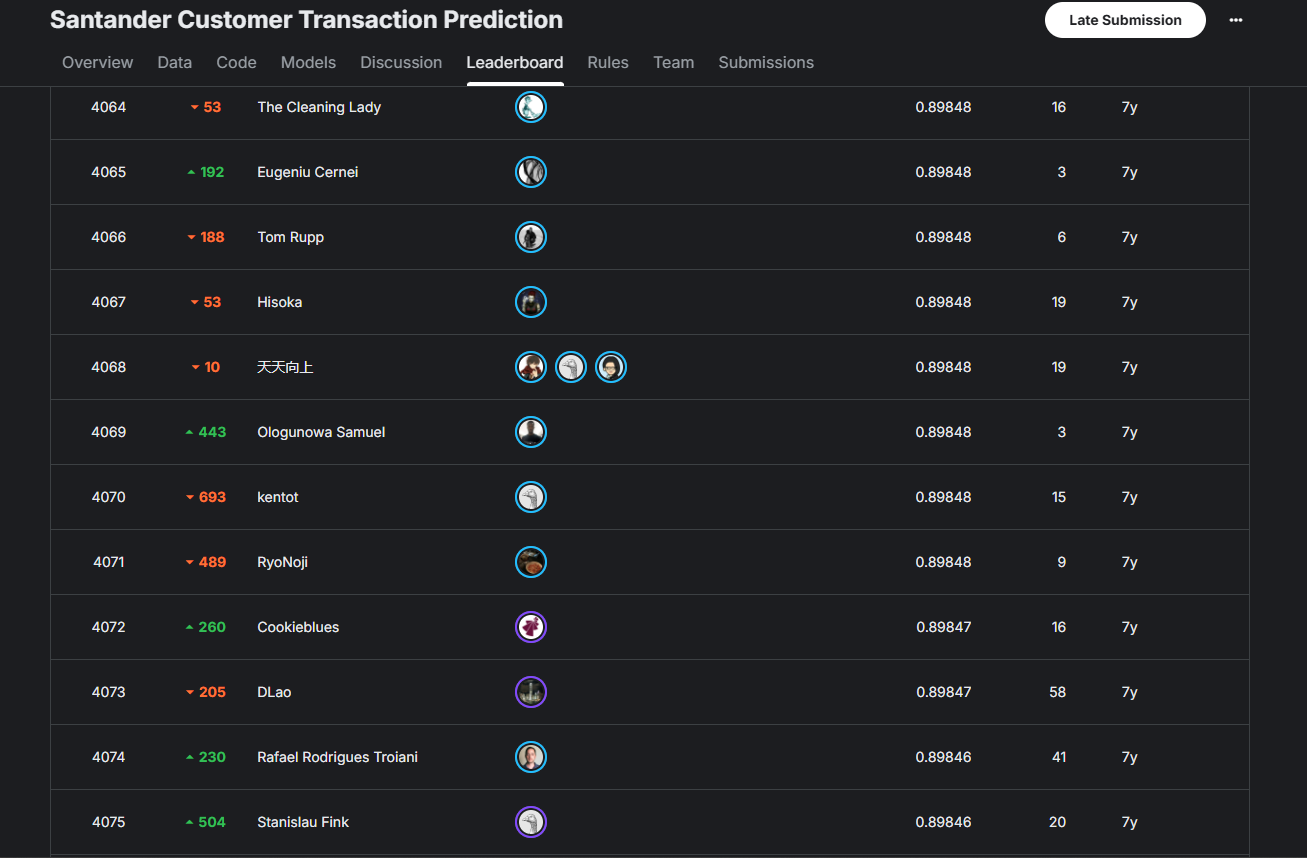

Так как у соревнования уже был дедлайн, могу только примерно показать где бы я находился(всего 8752)

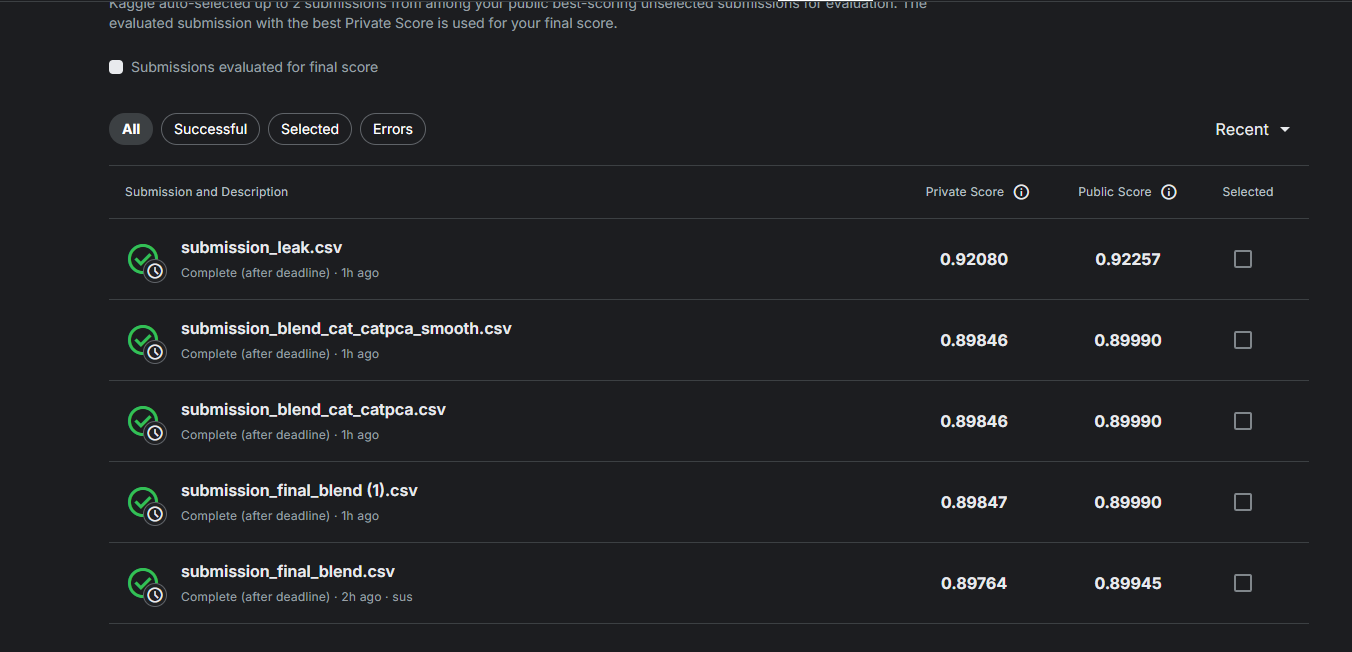